In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.datasets import load_iris
import numpy as np

In [2]:
torch.manual_seed(2)

# Load Iris Dataset

In [3]:
iris = load_iris()
X = iris.data
Y = iris.target

Use train_test_split to split data into train and validation set

In [4]:
from sklearn.model_selection import train_test_split
x, x_val, y, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

In [5]:
x.shape, y.shape, x_val.shape, y_val.shape

((100, 4), (100,), (50, 4), (50,))

In [6]:
x_train = x.reshape(-1, x.shape[1]).astype('float32')
y_train = y

x_val = x_val.reshape(-1, x_val.shape[1]).astype('float32')
y_val = y_val

In [7]:
x_train.shape

(100, 4)

Define validation data as a Pytorch Tensor

In [8]:
x_val = torch.from_numpy(x_val)
y_val = torch.from_numpy(y_val)

Put Data through DataLoader, so we can use batches

In [9]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.from_numpy(x_train)
        self.y=torch.from_numpy(y_train)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [10]:
data_set=Data()

In [11]:
trainloader=DataLoader(dataset=data_set,batch_size=64)

In [12]:
data_set.x[1:10]

tensor([[7.6000, 3.0000, 6.6000, 2.1000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.0000, 2.0000, 3.5000, 1.0000]])

In [13]:
data_set.y[1:10]

tensor([2, 1, 0, 2, 1, 0, 0, 0, 1])

In [14]:
data_set.x.shape, data_set.y.shape

(torch.Size([100, 4]), torch.Size([100]))

# Build Model and train it

Build softmax Classifier

In [144]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.relu(self.linear1(x))  
        x=self.linear2(x)
       # x=torch.softmax(x,1)
        return x

In [145]:
?torch.softmax

In [146]:
input_dim=4     # how many Variables are in the dataset
hidden_dim = 25 # hidden layers
output_dim=3    # number of classes
input_dim

4

In [147]:
# Instantiate model
model=Net(input_dim,hidden_dim,output_dim)

In [148]:
model

Net(
  (linear1): Linear(in_features=4, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=3, bias=True)
)

View the size of the model parameters:

In [149]:
print('W:',list(model.parameters())[0].size())
print('b',list(model.parameters())[1].size())

W: torch.Size([25, 4])
b torch.Size([25])


Loss function

In [150]:
criterion=nn.CrossEntropyLoss()

Optimizer

In [151]:
learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [152]:
y

tensor([0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
        1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [153]:
n_epochs=2000
loss_list=[]

#n_epochs
for epoch in range(n_epochs):
    for x, y in trainloader:
        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model(x)
        # calculate loss, da Cross Entropy benutzt wird muss ich in den loss Klassen vorhersagen, 
        # also Wahrscheinlichkeit pro Klasse. Das mach torch.max(y,1)[1])
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        
    loss_list.append(loss.data)
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1.892883062362671
epoch 1, loss 1.5045676231384277
epoch 2, loss 0.95252525806427
epoch 3, loss 0.8548805713653564
epoch 4, loss 0.7640973925590515
epoch 5, loss 0.701538622379303
epoch 6, loss 0.6572566628456116
epoch 7, loss 0.628869354724884
epoch 8, loss 0.6109012365341187
epoch 9, loss 0.6043145060539246
epoch 10, loss 0.5998801589012146
epoch 11, loss 0.5896980166435242
epoch 12, loss 0.5728713274002075
epoch 13, loss 0.5546756982803345
epoch 14, loss 0.5384930372238159
epoch 15, loss 0.5244078040122986
epoch 16, loss 0.5127970576286316
epoch 17, loss 0.5038247108459473
epoch 18, loss 0.4955613911151886
epoch 19, loss 0.4892359972000122
epoch 20, loss 0.4832691550254822
epoch 21, loss 0.4772246181964874
epoch 22, loss 0.4716830849647522
epoch 23, loss 0.46643176674842834
epoch 24, loss 0.46060478687286377
epoch 25, loss 0.4548695385456085
epoch 26, loss 0.44903481006622314
epoch 27, loss 0.44345706701278687
epoch 28, loss 0.4387305676937103
epoch 29, loss 0.43470788

epoch 241, loss 0.10097430646419525
epoch 242, loss 0.1004214957356453
epoch 243, loss 0.09987589716911316
epoch 244, loss 0.09956088662147522
epoch 245, loss 0.09901676326990128
epoch 246, loss 0.09851492941379547
epoch 247, loss 0.09803549945354462
epoch 248, loss 0.0976460874080658
epoch 249, loss 0.0972319096326828
epoch 250, loss 0.09229087084531784
epoch 251, loss 0.08962257206439972
epoch 252, loss 0.08831184357404709
epoch 253, loss 0.08764735609292984
epoch 254, loss 0.08728544414043427
epoch 255, loss 0.08706497400999069
epoch 256, loss 0.08699765056371689
epoch 257, loss 0.08679143339395523
epoch 258, loss 0.0866250991821289
epoch 259, loss 0.08647115528583527
epoch 260, loss 0.08638325333595276
epoch 261, loss 0.08250508457422256
epoch 262, loss 0.08392272144556046
epoch 263, loss 0.084690161049366
epoch 264, loss 0.08145628869533539
epoch 265, loss 0.08311866223812103
epoch 266, loss 0.080508291721344
epoch 267, loss 0.08247760683298111
epoch 268, loss 0.08012650161981583


epoch 525, loss 0.03547219932079315
epoch 526, loss 0.036028340458869934
epoch 527, loss 0.03552753105759621
epoch 528, loss 0.03537997975945473
epoch 529, loss 0.03583665192127228
epoch 530, loss 0.03544788807630539
epoch 531, loss 0.03528650104999542
epoch 532, loss 0.03570124879479408
epoch 533, loss 0.03543402999639511
epoch 534, loss 0.03531252220273018
epoch 535, loss 0.03560969606041908
epoch 536, loss 0.035455361008644104
epoch 537, loss 0.027221335098147392
epoch 538, loss 0.027689896523952484
epoch 539, loss 0.03160370513796806
epoch 540, loss 0.03214891627430916
epoch 541, loss 0.03446786850690842
epoch 542, loss 0.027317116037011147
epoch 543, loss 0.03103531338274479
epoch 544, loss 0.031785961240530014
epoch 545, loss 0.03430548682808876
epoch 546, loss 0.027259234338998795
epoch 547, loss 0.030984245240688324
epoch 548, loss 0.03174102306365967
epoch 549, loss 0.03434750437736511
epoch 550, loss 0.027270890772342682
epoch 551, loss 0.030926508828997612
epoch 552, loss 0.

epoch 768, loss 0.02458282932639122
epoch 769, loss 0.024549633264541626
epoch 770, loss 0.02457713708281517
epoch 771, loss 0.02454901859164238
epoch 772, loss 0.02455654926598072
epoch 773, loss 0.02458019368350506
epoch 774, loss 0.02453407272696495
epoch 775, loss 0.024578161537647247
epoch 776, loss 0.024543579667806625
epoch 777, loss 0.024552516639232635
epoch 778, loss 0.024535268545150757
epoch 779, loss 0.02455272525548935
epoch 780, loss 0.024575788527727127
epoch 781, loss 0.02454298734664917
epoch 782, loss 0.02455822378396988
epoch 783, loss 0.0245180893689394
epoch 784, loss 0.02457471936941147
epoch 785, loss 0.024538572877645493
epoch 786, loss 0.024530991911888123
epoch 787, loss 0.024563901126384735
epoch 788, loss 0.024535704404115677
epoch 789, loss 0.02455652318894863
epoch 790, loss 0.024527521803975105
epoch 791, loss 0.02454116754233837
epoch 792, loss 0.02452418953180313
epoch 793, loss 0.024556387215852737
epoch 794, loss 0.024569358676671982
epoch 795, loss 

epoch 996, loss 0.02437521144747734
epoch 997, loss 0.024404197931289673
epoch 998, loss 0.024388963356614113
epoch 999, loss 0.024406446143984795
epoch 1000, loss 0.02438972145318985
epoch 1001, loss 0.024380825459957123
epoch 1002, loss 0.024381302297115326
epoch 1003, loss 0.024410534650087357
epoch 1004, loss 0.024392029270529747
epoch 1005, loss 0.024394957348704338
epoch 1006, loss 0.024367455393075943
epoch 1007, loss 0.02439742349088192
epoch 1008, loss 0.024381479248404503
epoch 1009, loss 0.024393072351813316
epoch 1010, loss 0.024366527795791626
epoch 1011, loss 0.02440216764807701
epoch 1012, loss 0.024383356794714928
epoch 1013, loss 0.024389823898673058
epoch 1014, loss 0.024360714480280876
epoch 1015, loss 0.024387966841459274
epoch 1016, loss 0.02437286078929901
epoch 1017, loss 0.024387435987591743
epoch 1018, loss 0.02437206357717514
epoch 1019, loss 0.02438792772591114
epoch 1020, loss 0.024372648447752
epoch 1021, loss 0.02436930686235428
epoch 1022, loss 0.02436658

epoch 1271, loss 0.024187302216887474
epoch 1272, loss 0.024164050817489624
epoch 1273, loss 0.02418217621743679
epoch 1274, loss 0.02417737804353237
epoch 1275, loss 0.02414424903690815
epoch 1276, loss 0.024201171472668648
epoch 1277, loss 0.024151526391506195
epoch 1278, loss 0.024199143052101135
epoch 1279, loss 0.024148067459464073
epoch 1280, loss 0.02419179119169712
epoch 1281, loss 0.024150239303708076
epoch 1282, loss 0.02418346516788006
epoch 1283, loss 0.024147970601916313
epoch 1284, loss 0.024180762469768524
epoch 1285, loss 0.024144675582647324
epoch 1286, loss 0.02417362481355667
epoch 1287, loss 0.024146918207406998
epoch 1288, loss 0.02416517771780491
epoch 1289, loss 0.024144470691680908
epoch 1290, loss 0.02416856214404106
epoch 1291, loss 0.024153735488653183
epoch 1292, loss 0.02412414364516735
epoch 1293, loss 0.024184484034776688
epoch 1294, loss 0.024130946025252342
epoch 1295, loss 0.024177808314561844
epoch 1296, loss 0.024132851511240005
epoch 1297, loss 0.02

epoch 1502, loss 0.023864272981882095
epoch 1503, loss 0.0239323228597641
epoch 1504, loss 0.023874161764979362
epoch 1505, loss 0.0239226296544075
epoch 1506, loss 0.023873120546340942
epoch 1507, loss 0.02391219139099121
epoch 1508, loss 0.023875636979937553
epoch 1509, loss 0.023899948224425316
epoch 1510, loss 0.02387426607310772
epoch 1511, loss 0.023897597566246986
epoch 1512, loss 0.02388475462794304
epoch 1513, loss 0.02384936437010765
epoch 1514, loss 0.023917360231280327
epoch 1515, loss 0.023862389847636223
epoch 1516, loss 0.02390533871948719
epoch 1517, loss 0.023860882967710495
epoch 1518, loss 0.023894889280200005
epoch 1519, loss 0.023860204964876175
epoch 1520, loss 0.023884769529104233
epoch 1521, loss 0.023859478533267975
epoch 1522, loss 0.023883333429694176
epoch 1523, loss 0.023868588730692863
epoch 1524, loss 0.023837514221668243
epoch 1525, loss 0.023899883031845093
epoch 1526, loss 0.023847095668315887
epoch 1527, loss 0.023889774456620216
epoch 1528, loss 0.02

epoch 1782, loss 0.023475198075175285
epoch 1783, loss 0.023544758558273315
epoch 1784, loss 0.023486603051424026
epoch 1785, loss 0.023528732359409332
epoch 1786, loss 0.02348688803613186
epoch 1787, loss 0.023512836545705795
epoch 1788, loss 0.023487277328968048
epoch 1789, loss 0.02353309839963913
epoch 1790, loss 0.02348470129072666
epoch 1791, loss 0.02346036769449711
epoch 1792, loss 0.02352830208837986
epoch 1793, loss 0.02347533032298088
epoch 1794, loss 0.023510033264756203
epoch 1795, loss 0.02347514219582081
epoch 1796, loss 0.023516416549682617
epoch 1797, loss 0.02348620444536209
epoch 1798, loss 0.023449253290891647
epoch 1799, loss 0.023524992167949677
epoch 1800, loss 0.023460716009140015
epoch 1801, loss 0.023505738005042076
epoch 1802, loss 0.023463048040866852
epoch 1803, loss 0.02350803278386593
epoch 1804, loss 0.023461520671844482
epoch 1805, loss 0.023511916399002075
epoch 1806, loss 0.02346162497997284
epoch 1807, loss 0.023437174037098885
epoch 1808, loss 0.023

In [154]:
len(loss_list)

2000

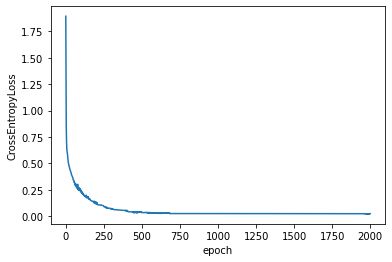

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(n_epochs), loss_list)
plt.ylabel('CrossEntropyLoss')
plt.xlabel('epoch');

In [156]:
z[0:10]

tensor([[ 22.5167,  12.9048, -36.1242],
        [-10.3394,   3.3370,   6.2681],
        [ -2.2984,   6.5462,  -4.6962],
        [ -9.8748,   3.2390,   5.9897],
        [  1.3702,   7.5816,  -9.6331],
        [ -3.0567,   5.5955,  -2.8587],
        [ -4.0245,   6.2555,  -2.6972],
        [ 14.4561,   9.2089, -24.5352],
        [ -3.2941,   7.2223,  -4.5702],
        [ -5.3853,   5.3257,  -0.3879]], grad_fn=<SliceBackward>)

Each row represents a row from the original dataset. Each column represents a class. The first column represents the class 0, the second column class 1 and the third column class 2. The highest value for each row represents which class the model would put each row. For instance, the highest value in the first row is 9.3748, hence the predicted class is 0.  

Check model on Validation Set

In [157]:
z=model(x_val)

In [158]:
yhat=torch.max(z.data,1)
yhat

torch.return_types.max(
values=tensor([ 5.8113, 22.7620, 13.0673,  5.2398,  6.1183, 20.6962,  7.2495,  6.8131,
         4.1111,  6.9719,  4.9263, 19.0786, 22.9582, 19.3369, 22.5178,  5.9414,
         9.8951,  6.5343,  5.1800,  9.6908, 18.6860,  4.5682, 19.5309,  9.3494,
         6.1294,  7.9243,  9.1184,  9.8739, 18.3638, 18.3659, 23.0958, 26.2877,
         7.6616, 19.8779, 19.4231,  7.0828,  6.8305, 21.5472, 22.1129, 24.9285,
         7.9093,  6.1627,  6.6115, 24.0753, 22.9230,  6.6793,  4.6606,  6.9194,
         7.3271, 10.0708]),
indices=tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2,
        1, 2]))

In [159]:
y_val

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2,
        1, 2])

In [99]:
yhat.indices*

tensor(0)